In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-06-01 13:00:04.508294: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images_era5.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10195  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
10196  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10197  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10198  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10199  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.209999   
1      4.113529  4.223896  63.821798  62.581992  ...           112.209999   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.699997   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.699997   
4      4.405489  4.587935  60.655199  58.351445  ...            56.239998   
...         ...       ...        ...        ...  ...                  ...   
10195  4.346215  4.374028  86.797202  86.444072  ...           -13.349999   
10196  4.236066  4.264247  89.521652  89.357990  ...           105.129997   
10197  4.237512  4.264786  90.106352  89.978233  ...           105.129997   
10198  3.745458  3.792684  82.634552  82.112733  ...          -145.229996   
10199  3.823687  3.867705  84.046602  83.596072  ...          -147.250000   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.379997           22.689999            62.099998   
1               67.379997           22.689999            62.099998   
2              -98.750000          -52.799999            57.230000   
3              -98.750000          -52.799999            57.230000   
4              101.639999          146.940002            36.759998   
...                   ...                 ...                  ...   
10195          -57.930000         -102.669998            58.980000   
10196           60.469997           15.740000            52.669998   
10197           60.469997           15.740000            52.669998   
10198          -99.439995          -53.639999            52.279999   
10199         -101.619995          -55.939999            47.379997   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               50.959999           61.959999    20180403T030600Z   
1               50.959999           61.959999    20180403T030600Z   
2               45.759998           57.119999    20180404T042700Z   
3               45.759998           57.119999    20180404T042700Z   
4               27.439999           36.730000    20180404T175400Z   
...                   ...                 ...                 ...   
10195           47.930000           59.090000    20200121T132400Z   
10196           41.669998           52.629997    20200121T200600Z   
10197           41.669998           52.629997    20200121T200600Z   
10198           41.049999           52.180000    20200121T214800Z   
10199           36.430000           47.020000    20200121T221800Z   

             stop_sensing_time        u10        v10  
0      20180403T044758.125000Z   1.125562  -5.806792  
1      20180403T044758.125000Z   0.063789  -5.914661  
2      20180404T060858.125000Z  -0.424115   1.525726  
3      20180404T060858.125000Z   0.056819   2.623381  
4      20180404T193258.125000Z  -0.504271   6.171964  
...                        ...        ...        ...  
10195  20200121T150558.125000Z   1.487218  11.194811  
10196  20200121T2

In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10195  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
10196  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10197  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10198  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10199  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.209999   
1      4.113529  4.223896  63.821798  62.581992  ...           112.209999   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.699997   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.699997   
4      4.405489  4.587935  60.655199  58.351445  ...            56.239998   
...         ...       ...        ...        ...  ...                  ...   
10195  4.346215  4.374028  86.797202  86.444072  ...           -13.349999   
10196  4.236066  4.264247  89.521652  89.357990  ...           105.129997   
10197  4.237512  4.264786  90.106352  89.978233  ...           105.129997   
10198  3.745458  3.792684  82.634552  82.112733  ...          -145.229996   
10199  3.823687  3.867705  84.046602  83.596072  ...          -147.250000   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.379997           22.689999            62.099998   
1               67.379997           22.689999            62.099998   
2              -98.750000          -52.799999            57.230000   
3              -98.750000          -52.799999            57.230000   
4              101.639999          146.940002            36.759998   
...                   ...                 ...                  ...   
10195          -57.930000         -102.669998            58.980000   
10196           60.469997           15.740000            52.669998   
10197           60.469997           15.740000            52.669998   
10198          -99.439995          -53.639999            52.279999   
10199         -101.619995          -55.939999            47.379997   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               50.959999           61.959999    20180403T030600Z   
1               50.959999           61.959999    20180403T030600Z   
2               45.759998           57.119999    20180404T042700Z   
3               45.759998           57.119999    20180404T042700Z   
4               27.439999           36.730000    20180404T175400Z   
...                   ...                 ...                 ...   
10195           47.930000           59.090000    20200121T132400Z   
10196           41.669998           52.629997    20200121T200600Z   
10197           41.669998           52.629997    20200121T200600Z   
10198           41.049999           52.180000    20200121T214800Z   
10199           36.430000           47.020000    20200121T221800Z   

             stop_sensing_time        u10        v10  
0      20180403T044758.125000Z   1.125562  -5.806792  
1      20180403T044758.125000Z   0.063789  -5.914661  
2      20180404T060858.125000Z  -0.424115   1.525726  
3      20180404T060858.125000Z   0.056819   2.623381  
4      20180404T193258.125000Z  -0.504271   6.171964  
...                        ...        ...        ...  
10195  20200121T150558.125000Z   1.487218  11.194811  
10196  20200121T2

In [7]:
df = df.sample(frac = 1, random_state=77)
df     

CE        CN          IR           Lv          P10         Pair  \
8291  -0.012150 -0.032903  266.100000  2491.995719  1031.113303  1032.385986   
3812   0.009946 -0.040725  325.699998  2486.762542  1002.355768  1003.579007   
2220  -0.098607 -0.048255  292.959996  2465.628629  1012.968245  1014.174503   
4495   0.547509  0.022966  337.584998  2482.259844   993.137445   994.339005   
1173   0.085739  0.094400  357.980002  2471.653475  1017.458491  1018.669986   
...         ...       ...         ...          ...          ...          ...   
7832  -0.012150 -0.032903  272.535001  2491.064483  1016.776770  1018.032996   
9509   0.065996 -0.026629  273.849998  2476.814342  1011.035600  1012.250504   
2283   0.016743 -0.032014  288.435002  2467.407841  1014.254360  1015.478500   
10196  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
8799  -0.012150 -0.032903  331.705000  2484.796885  1011.504464  1012.736490   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
8291   4.375262  4.390499  93.076403  93.066660  ...            53.500000   
3812   5.421004  5.432089  90.952000  90.829780  ...           105.349998   
2220   5.485714  5.685436  62.488897  60.825029  ...            56.160000   
4495   6.040936  6.061799  86.591240  86.278805  ...            73.409996   
1173   8.439131  8.454612  95.247900  95.275105  ...            54.480000   
...         ...       ...        ...        ...  ...                  ...   
7832   3.411718  3.462474  73.038053  72.278851  ...            49.070000   
9509   6.481914  6.540536  83.244302  82.543787  ...            55.559998   
2283   3.801912  4.031039  56.148297  53.812369  ...           -24.299999   
10196  4.236066  4.264247  89.521652  89.357990  ...           105.129997   
8799   4.436205  4.520474  72.850603  71.568573  ...           -12.940000   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
8291            99.329994          145.099991            52.219997   
3812            60.669998           15.929999            51.360001   
2220           101.400002          146.589996            37.619999   
4495           117.959999          162.399994            59.059998   
1173           100.189995          145.770004            48.719997   
...                   ...                 ...                  ...   
7832            95.549995          141.940002            63.939999   
9509           101.309998          146.940002            46.489998   
2283           -69.070000         -113.919998            61.529999   
10196           60.469997           15.740000            52.669998   
8799           -57.509998         -102.110001            58.449997   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
8291            41.040001           52.239998    20210402T110300Z   
3812            40.430000           51.329998    20170612T204500Z   
2220            28.219999           37.610001    20171118T141200Z   
4495            47.939999           58.859997    20160129T130900Z   
1173            37.790001           48.719997    20160916T174500Z   
...                   ...                 ...                 ...   
7832            52.369999           63.719997    20210118T120300Z   
9509            35.770000           46.469997    20190816T122700Z   
2283            50.469997           61.609997    20171207T151500Z   
10196           41.669998           52.629997    20200121T200600Z   
8799            47.399998           58.489998    20210618T140600Z   

             stop_sensing_time       u10        v10  
8291   20210402T124458.125000Z  6.045154   7.037160  
3812   20170612T222658.125000Z -6.122303  -9.317768  
2220   20171118T155058.125000Z  5.725120   4.448625  
4495   20160129T144758.125000Z  5.358885 -13.263199  
1173   20160916T192358.125000Z  1.669808  -3.258454  
...                        ...       ...        ...  
7832   20210118T134158.125000Z  6.045154   7.037160  
9509   20190816T140858.12

In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

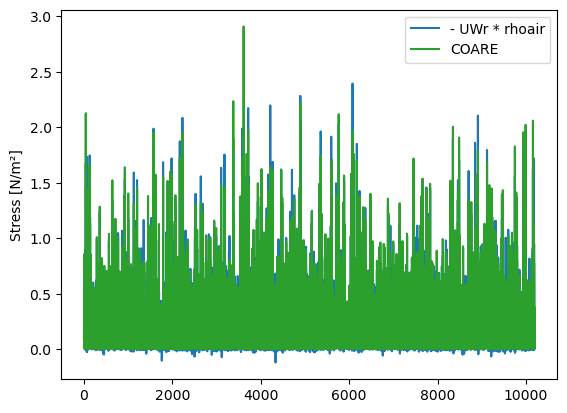

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

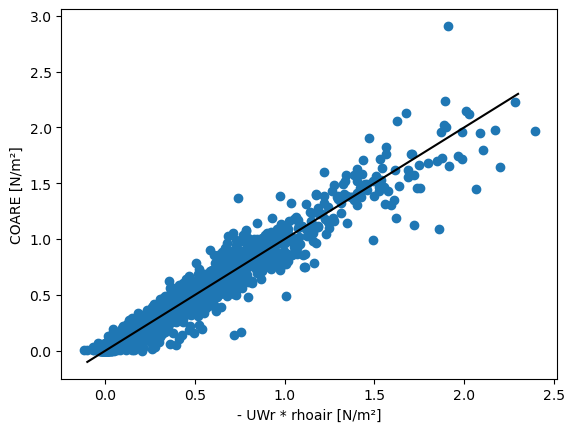

In [10]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(10200, 67)

In [13]:
df.shape[0]*0.8

8160.0

In [14]:
split_idx = 8160

# Prepare features and labels

In [15]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10'
]

In [16]:
x = df[predictor_variables]
x

sigma0_trip_fore  sigma0_trip_mid  sigma0_trip_aft  \
8291         -21.329966       -20.314684       -20.953699   
3812         -20.943676       -13.976841       -16.550650   
2220         -13.540611       -10.180238       -18.316372   
4495         -20.408886       -14.060665       -14.675045   
1173         -18.629818       -16.368279       -17.564482   
...                 ...              ...              ...   
7832         -27.140862       -23.478655       -28.449240   
9509         -22.741312       -14.892164       -18.181908   
2283         -22.848459       -16.476969       -19.476072   
10196        -20.899197       -14.651740       -17.077446   
8799         -33.386471       -26.202229       -28.333775   

       azi_angle_trip_fore  azi_angle_trip_mid  azi_angle_trip_aft  \
8291             53.500000           99.329994          145.099991   
3812            105.349998           60.669998           15.929999   
2220             56.160000          101.400002          146.589996   
4495             73.409996          117.959999          162.399994   
1173             54.480000          100.189995          145.770004   
...                    ...                 ...                 ...   
7832             49.070000           95.549995          141.940002   
9509             55.559998          101.309998          146.940002   
2283            -24.299999          -69.070000         -113.919998   
10196           105.129997           60.469997           15.740000   
8799            -12.940000          -57.509998         -102.110001   

       inc_angle_trip_fore  inc_angle_trip_mid  inc_angle_trip_aft       u10  \
8291             52.219997           41.040001           52.239998  6.045154   
3812             51.360001           40.430000           51.329998 -6.122303   
2220             37.619999           28.219999           37.610001  5.725120   
4495             59.059998           47.939999           58.859997  5.358885   
1173             48.719997           37.790001           48.719997  1.669808   
...                    ...                 ...                 ...       ...   
7832             63.939999           52.369999           63.719997  6.045154   
9509             46.489998           35.770000           46.469997  4.793102   
2283             61.529999           50.469997           61.609997  9.488249   
10196            52.669998           41.669998           52.629997  4.111861   
8799             58.449997           47.399998           58.489998  6.045154   

             v10  
8291    7.037160  
3812   -9.317768  
2220    4.448625  
4495  -13.263199  
1173   -3.258454  
...          ...  
7832    7.037160  
9509   -5.152116  
2283   -0.378240  
10196   8.730479  
8799    7.037160  

[10200 rows x 11 columns]

In [17]:
y = - df['UWr'] * df['rhoair']
y

8291     0.142940
3812     0.248008
2220     0.128759
4495     0.448188
1173     0.011088
           ...   
7832     0.026857
9509     0.048700
2283     0.157549
10196    0.061098
8799     0.006362
Length: 10200, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [18]:
c = df['stress']

In [19]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [20]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [21]:
c_train = c[:split_idx]
c_test = c[split_idx:]

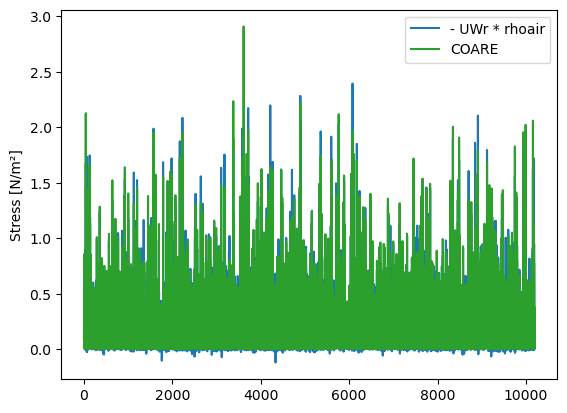

In [22]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [23]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [25]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [26]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [27]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-05-26 08:21:45.564370: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-26 08:21:45.565873: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-26 08:21:45.565885: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-26 08:21:45.565902: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ppi-r8login-b2.int.met.no): /proc/driver/nvidia/version does not exist
2023-05-26 08:21:45.566368: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations,

Epoch 1/500
179/179 [==============================] - 1s 4ms/step - loss: 3.9496 - mean_absolute_error: 0.9963 - val_loss: 1.1446 - val_mean_absolute_error: 0.7606
Epoch 2/500
179/179 [==============================] - 0s 726us/step - loss: 2.3440 - mean_absolute_error: 0.7972 - val_loss: 0.8764 - val_mean_absolute_error: 0.6420
Epoch 3/500
179/179 [==============================] - 0s 659us/step - loss: 1.6924 - mean_absolute_error: 0.6571 - val_loss: 0.7572 - val_mean_absolute_error: 0.5861
Epoch 4/500
179/179 [==============================] - 0s 635us/step - loss: 2.1955 - mean_absolute_error: 0.6403 - val_loss: 0.6976 - val_mean_absolute_error: 0.5554
Epoch 5/500
179/179 [==============================] - 0s 638us/step - loss: 1.8303 - mean_absolute_error: 0.6009 - val_loss: 0.6637 - val_mean_absolute_error: 0.5378
Epoch 6/500
179/179 [==============================] - 0s 627us/step - loss: 2.1041 - mean_absolute_error: 0.5892 - val_loss: 0.6413 - val_mean_absolute_error: 0.5264


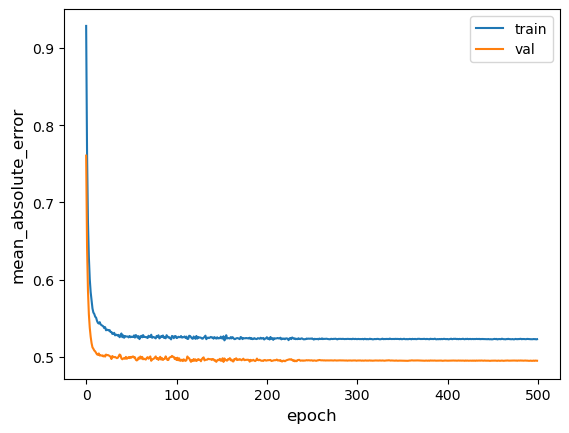

64/64 [==============================] - 0s 399us/step - loss: 0.7200 - mean_absolute_error: 0.5397
Test accuracy 0.539742112159729
Test loss 0.72004634141922


In [30]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [31]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [32]:
np.mean(y_test)

0.17533387401213504

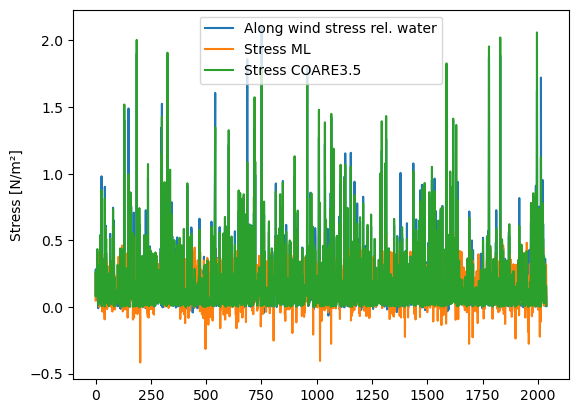

In [33]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

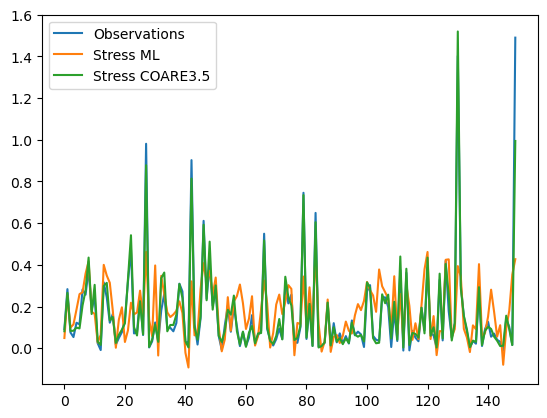

In [36]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

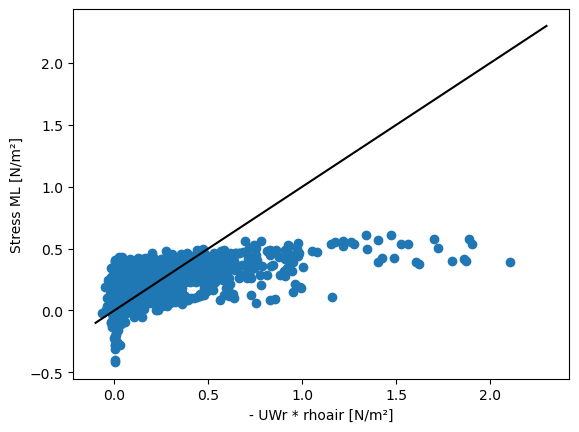

In [37]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

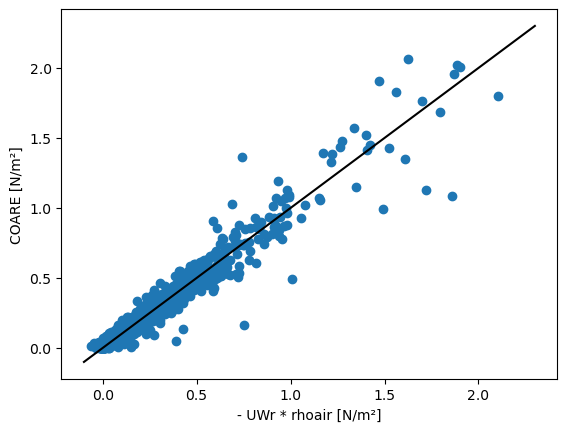

In [38]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [39]:
rmse(y_test.values, y_test_pred)

0.2825773824023275

In [40]:
rmse(y_test.values, c_test)

0.056241578532168816

## Correlation

In [41]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.58950361],
       [0.58950361, 1.        ]])

In [42]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

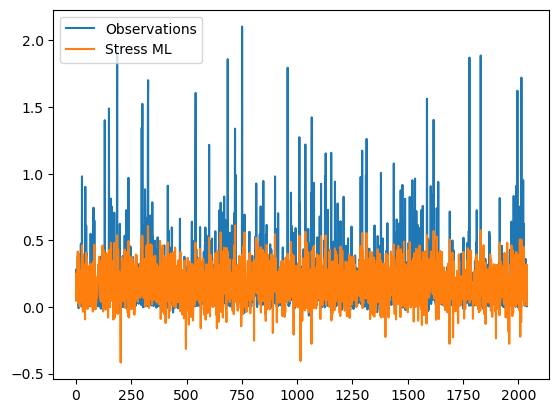

In [43]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [44]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.58950361],
       [0.58950361, 1.        ]])

In [45]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [46]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.2825773824023275

# Other experiments

In [47]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [48]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [49]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 2.2859 - mean_absolute_error: 1.0869 - val_loss: 0.9238 - val_mean_absolute_error: 0.6707
Epoch 2/500
179/179 [==============================] - 0s 846us/step - loss: 1.0059 - mean_absolute_error: 0.6473 - val_loss: 0.6629 - val_mean_absolute_error: 0.5192
Epoch 3/500
179/179 [==============================] - 0s 822us/step - loss: 0.8664 - mean_absolute_error: 0.5738 - val_loss: 0.6063 - val_mean_absolute_error: 0.5011
Epoch 4/500
179/179 [==============================] - 0s 839us/step - loss: 0.7634 - mean_absolute_error: 0.5533 - val_loss: 0.5803 - val_mean_absolute_error: 0.4803
Epoch 5/500
179/179 [==============================] - 0s 822us/step - loss: 0.7465 - mean_absolute_error: 0.5416 - val_loss: 0.5932 - val_mean_absolute_error: 0.5046
Epoch 6/500
179/179 [==============================] - 0s 827us/step - loss: 0.6919 - mean_absolute_error: 0.5283 - val_loss: 0.5814 - val_mean_absolute_error: 0.4937


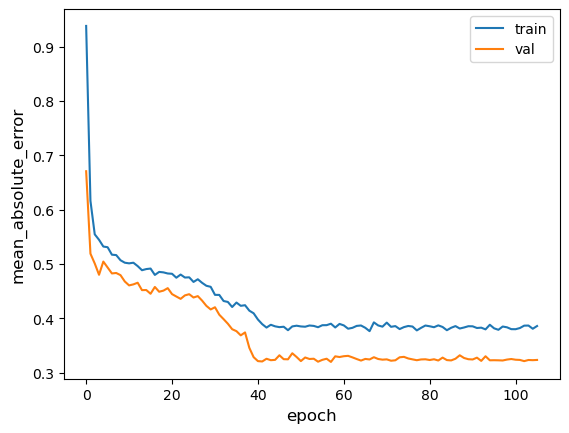

64/64 [==============================] - 0s 396us/step - loss: 0.3682 - mean_absolute_error: 0.3582
Test accuracy 0.35815155506134033
Test loss 0.3681870102882385


In [50]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [51]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

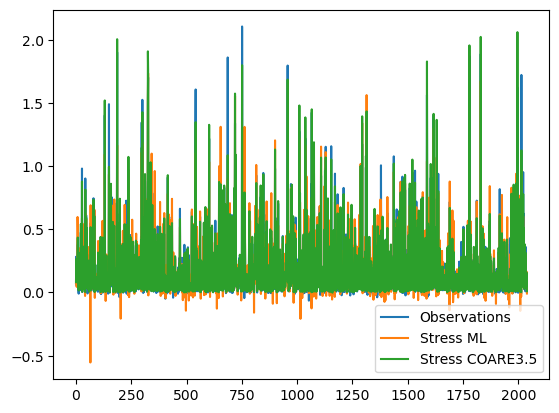

In [52]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

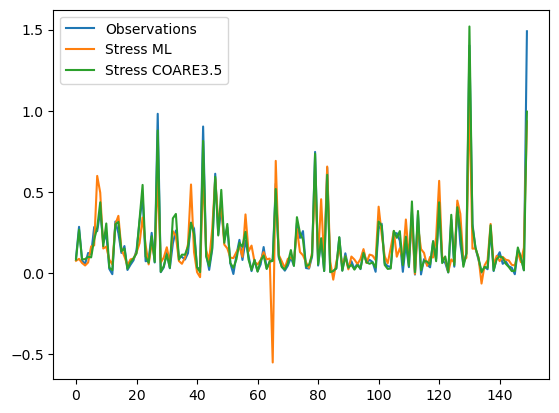

In [53]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [54]:
rmse(y_test.values, y_test_pred)

0.3219688554113992

## Correlation

In [55]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.81690584],
       [0.81690584, 1.        ]])

In [56]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [57]:
y_test.values.shape

(2040,)

In [58]:
y_test_pred[:, 0].shape

(2040,)

In [59]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [60]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([0.09144661, 0.28334564, 0.07565986, ..., 0.15754948, 0.06109848,
       0.00636154])

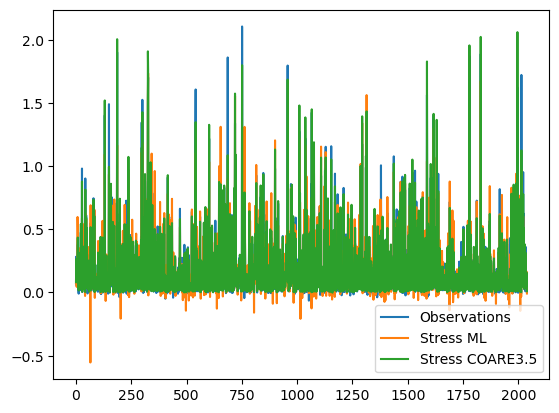

In [61]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

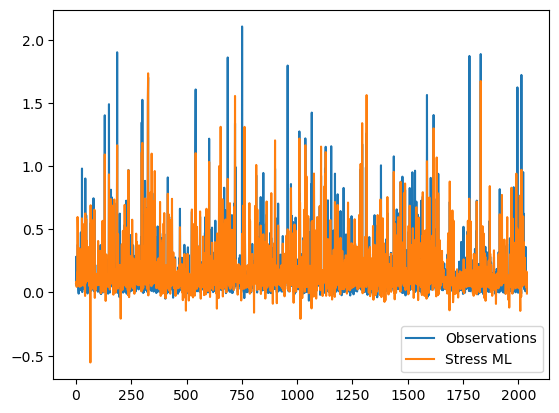

In [62]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [63]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [64]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3219688554113992

Text(0, 0.5, 'Stress ML [N/m²]')

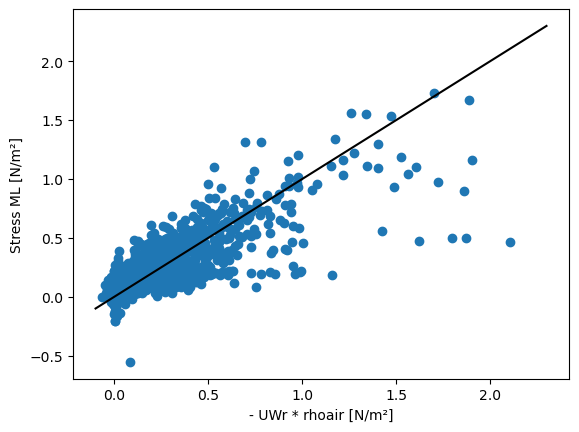

In [65]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [66]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [67]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [68]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
90/90 [==============================] - 0s 2ms/step - loss: 2.6360 - mean_absolute_error: 1.1872 - val_loss: 1.2501 - val_mean_absolute_error: 0.8184
Epoch 2/500
90/90 [==============================] - 0s 1ms/step - loss: 1.7671 - mean_absolute_error: 0.9614 - val_loss: 0.8944 - val_mean_absolute_error: 0.6630
Epoch 3/500
90/90 [==============================] - 0s 910us/step - loss: 1.3486 - mean_absolute_error: 0.8248 - val_loss: 0.7188 - val_mean_absolute_error: 0.5736
Epoch 4/500
90/90 [==============================] - 0s 931us/step - loss: 0.9961 - mean_absolute_error: 0.7067 - val_loss: 0.6469 - val_mean_absolute_error: 0.5330
Epoch 5/500
90/90 [==============================] - 0s 918us/step - loss: 1.0157 - mean_absolute_error: 0.6830 - val_loss: 0.6140 - val_mean_absolute_error: 0.5120
Epoch 6/500
90/90 [==============================] - 0s 945us/step - loss: 0.9557 - mean_absolute_error: 0.6547 - val_loss: 0.5928 - val_mean_absolute_error: 0.4967
Epoch 7/500
90

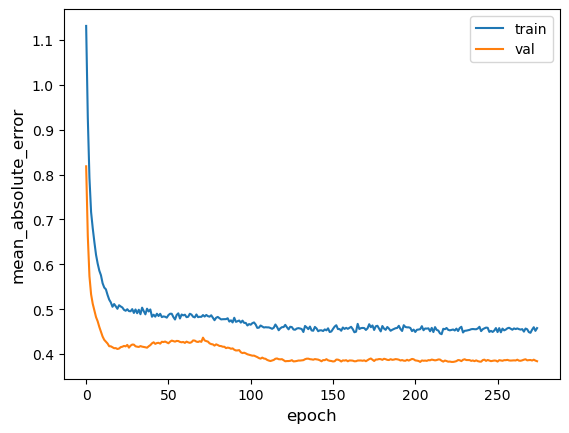

64/64 [==============================] - 0s 351us/step - loss: 0.4785 - mean_absolute_error: 0.4137
Test accuracy 0.4137018918991089
Test loss 0.47851598262786865


In [69]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [70]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [71]:
rmse(y_test.values, y_test_pred)

0.2776530238948509

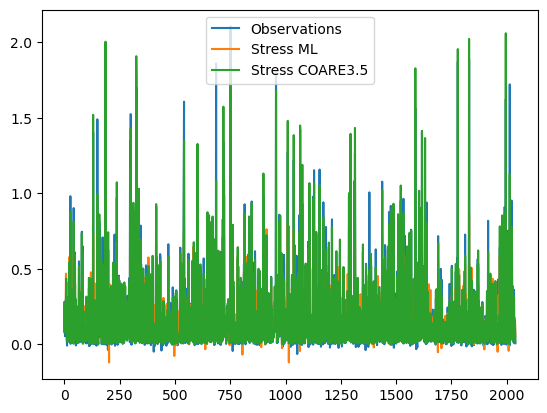

In [72]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

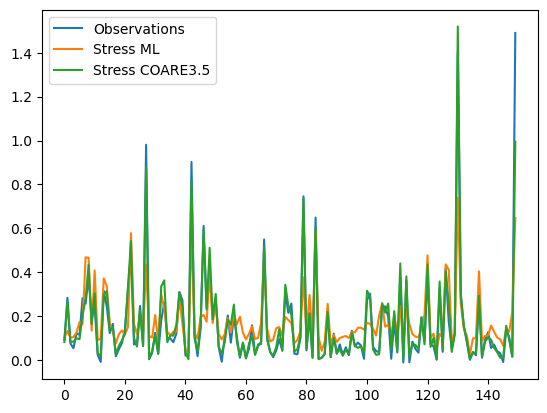

In [73]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

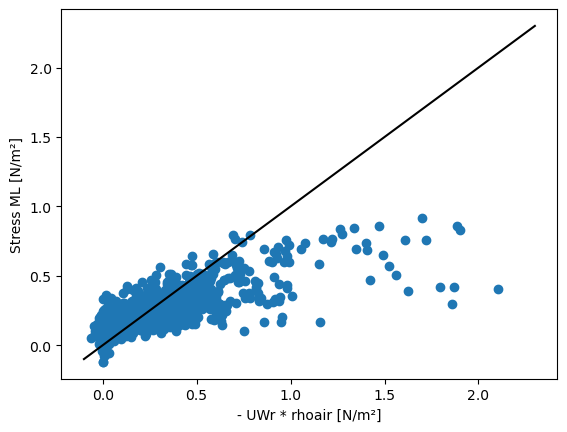

In [74]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [75]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.79880024],
       [0.79880024, 1.        ]])

In [76]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

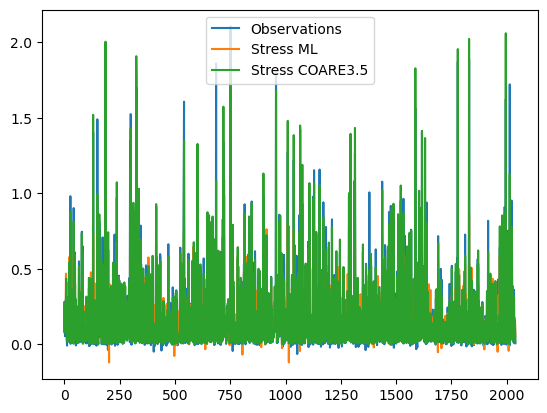

In [77]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

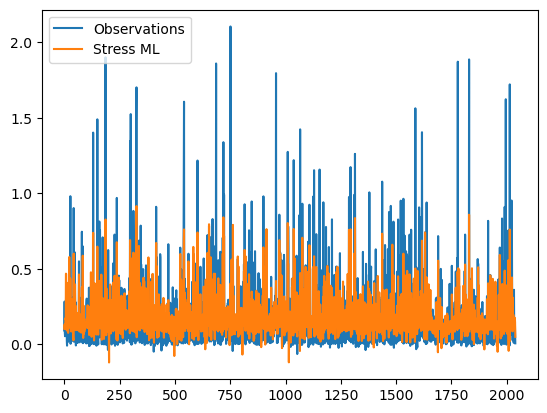

In [78]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [79]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [80]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2776530238948509

Text(0, 0.5, 'Stress ML [N/m²]')

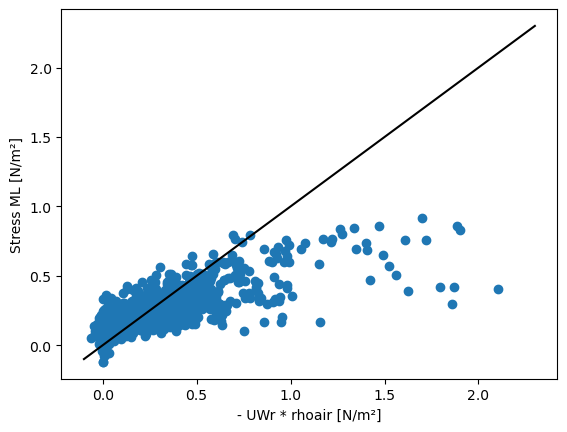

In [81]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [82]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [83]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [84]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 1.8175 - mean_absolute_error: 0.9665 - val_loss: 0.5971 - val_mean_absolute_error: 0.5093
Epoch 2/500
179/179 [==============================] - 0s 797us/step - loss: 0.9414 - mean_absolute_error: 0.6513 - val_loss: 0.4895 - val_mean_absolute_error: 0.4305
Epoch 3/500
179/179 [==============================] - 0s 714us/step - loss: 0.7367 - mean_absolute_error: 0.5648 - val_loss: 0.4587 - val_mean_absolute_error: 0.4034
Epoch 4/500
179/179 [==============================] - 0s 766us/step - loss: 0.6941 - mean_absolute_error: 0.5332 - val_loss: 0.4413 - val_mean_absolute_error: 0.3900
Epoch 5/500
179/179 [==============================] - 0s 771us/step - loss: 0.6203 - mean_absolute_error: 0.4908 - val_loss: 0.4319 - val_mean_absolute_error: 0.3838
Epoch 6/500
179/179 [==============================] - 0s 824us/step - loss: 0.6534 - mean_absolute_error: 0.4850 - val_loss: 0.4159 - val_mean_absolute_error: 0.3768


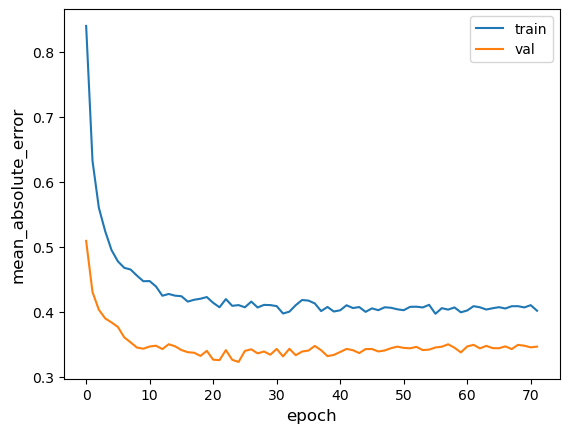

64/64 [==============================] - 0s 392us/step - loss: 0.3773 - mean_absolute_error: 0.3778
Test accuracy 0.37778475880622864
Test loss 0.3772577941417694


In [85]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [86]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [87]:
rmse(y_test.values, y_test_pred)

0.2980992345637397

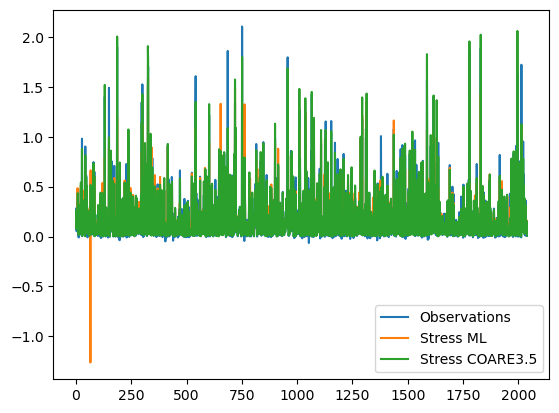

In [88]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

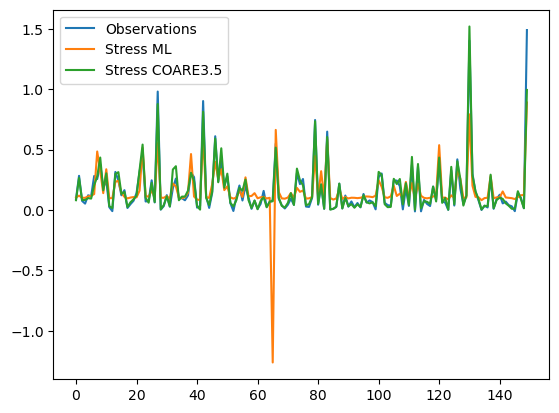

In [89]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

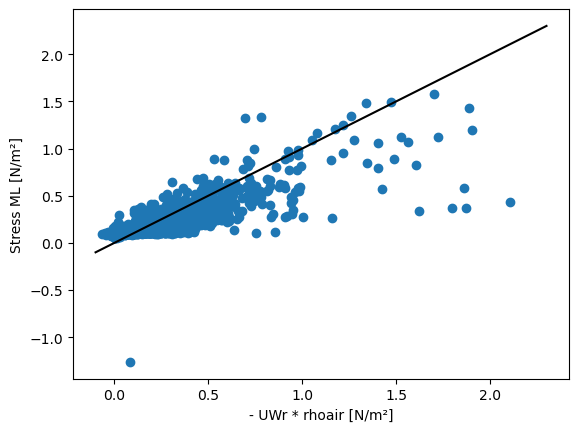

In [90]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [91]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.82163328],
       [0.82163328, 1.        ]])

In [92]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

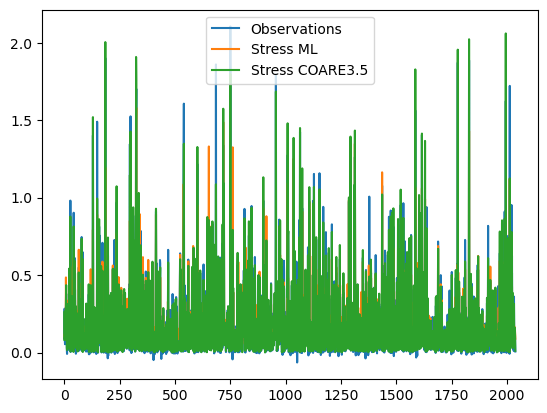

In [93]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

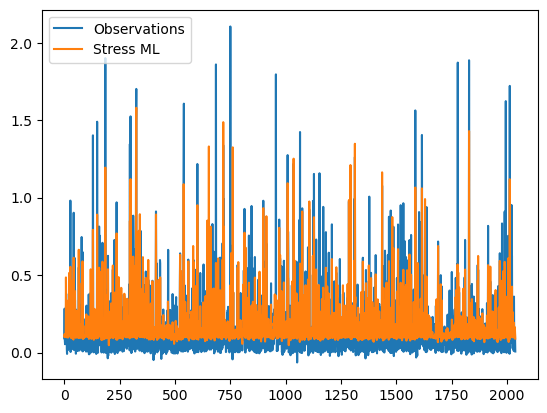

In [94]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [95]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97385686],
       [0.97385686, 1.        ]])

In [96]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.29646136438945836

Text(0, 0.5, 'Stress ML [N/m²]')

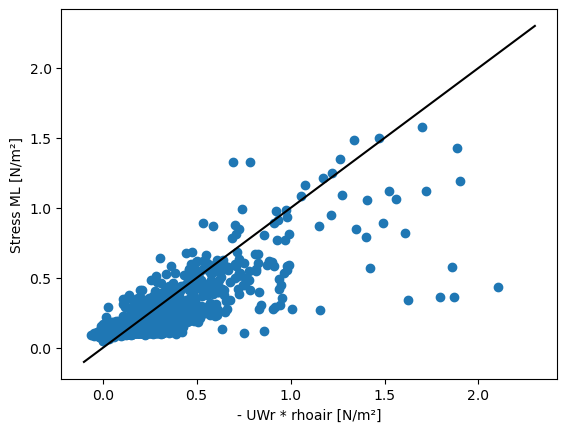

In [97]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [98]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [99]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [100]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 2ms/step - loss: 1.7018 - mean_absolute_error: 0.9275 - val_loss: 0.6381 - val_mean_absolute_error: 0.4594
Epoch 2/500
179/179 [==============================] - 0s 1ms/step - loss: 0.7032 - mean_absolute_error: 0.6038 - val_loss: 0.4019 - val_mean_absolute_error: 0.3625
Epoch 3/500
179/179 [==============================] - 0s 1ms/step - loss: 0.6387 - mean_absolute_error: 0.5543 - val_loss: 0.3557 - val_mean_absolute_error: 0.3320
Epoch 4/500
179/179 [==============================] - 0s 1ms/step - loss: 0.5386 - mean_absolute_error: 0.4868 - val_loss: 0.3094 - val_mean_absolute_error: 0.3092
Epoch 5/500
179/179 [==============================] - 0s 1ms/step - loss: 0.5089 - mean_absolute_error: 0.4669 - val_loss: 0.2970 - val_mean_absolute_error: 0.3068
Epoch 6/500
179/179 [==============================] - 0s 1ms/step - loss: 0.3925 - mean_absolute_error: 0.4095 - val_loss: 0.2902 - val_mean_absolute_error: 0.2970
Epoch 7/50

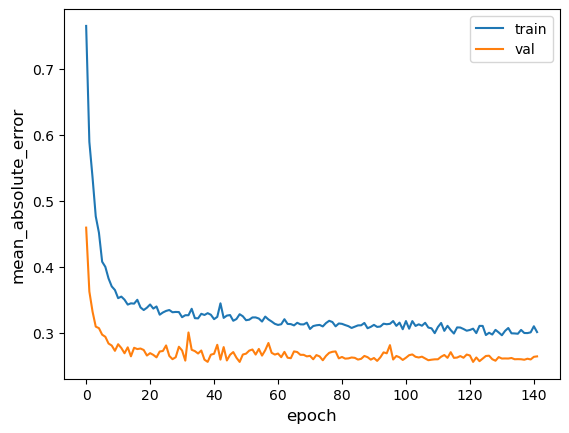

64/64 [==============================] - 0s 407us/step - loss: 0.2486 - mean_absolute_error: 0.2801
Test accuracy 0.2801401913166046
Test loss 0.2485913187265396


In [101]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [102]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [103]:
rmse(y_test.values, y_test_pred)

0.33805838226313806

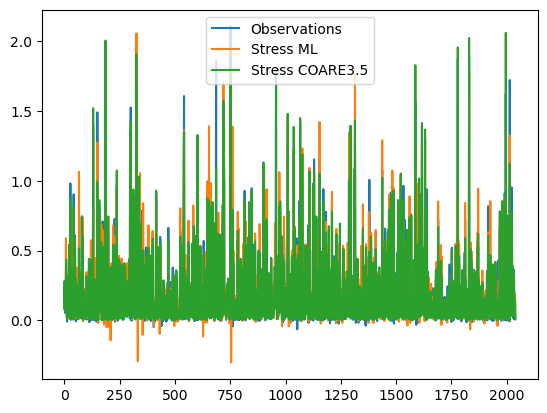

In [104]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

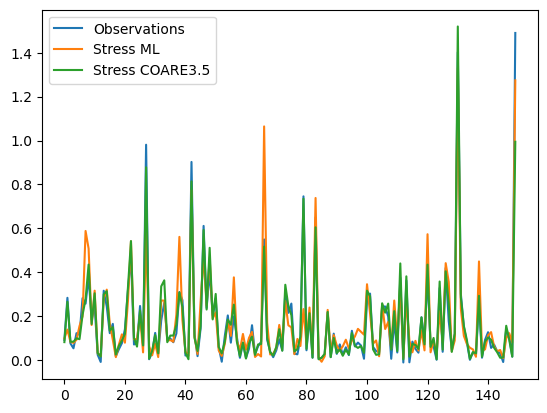

In [105]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

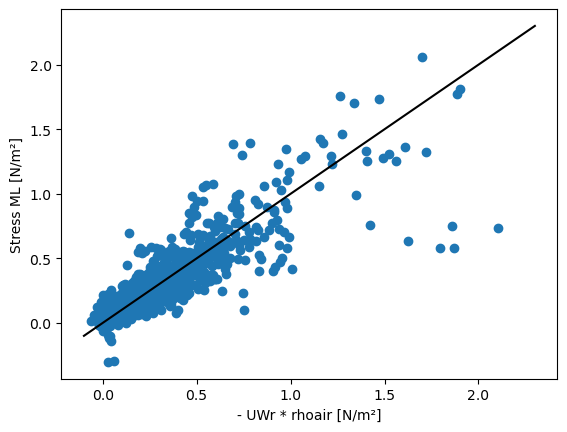

In [106]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [107]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.88269264],
       [0.88269264, 1.        ]])

In [108]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

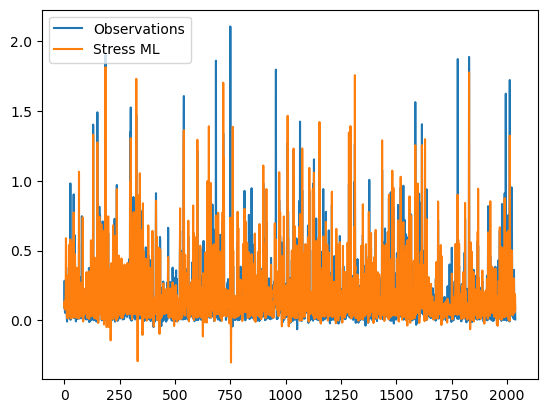

In [109]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [110]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2.5], c_test.values[y_test_pred[:, 0] < 2.5])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [111]:
rmse(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])

0.33805838226313806

Text(0, 0.5, 'Stress ML [N/m²]')

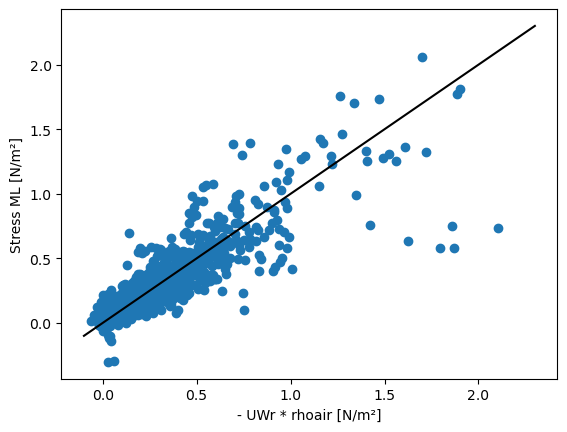

In [112]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [113]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.88269264],
       [0.88269264, 1.        ]])

In [114]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [115]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [116]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [117]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 4ms/step - loss: 2.4333 - mean_absolute_error: 1.1380 - val_loss: 0.6979 - val_mean_absolute_error: 0.4952
Epoch 2/500
179/179 [==============================] - 1s 4ms/step - loss: 0.7619 - mean_absolute_error: 0.6160 - val_loss: 0.4763 - val_mean_absolute_error: 0.3881
Epoch 3/500
179/179 [==============================] - 1s 4ms/step - loss: 0.5762 - mean_absolute_error: 0.5242 - val_loss: 0.3792 - val_mean_absolute_error: 0.3439
Epoch 4/500
179/179 [==============================] - 1s 4ms/step - loss: 0.5008 - mean_absolute_error: 0.4789 - val_loss: 0.2873 - val_mean_absolute_error: 0.3085
Epoch 5/500
179/179 [==============================] - 1s 4ms/step - loss: 0.4187 - mean_absolute_error: 0.4374 - val_loss: 0.2737 - val_mean_absolute_error: 0.2914
Epoch 6/500
179/179 [==============================] - 1s 4ms/step - loss: 0.3902 - mean_absolute_error: 0.3945 - val_loss: 0.2629 - val_mean_absolute_error: 0.2763
Epoch 7/50

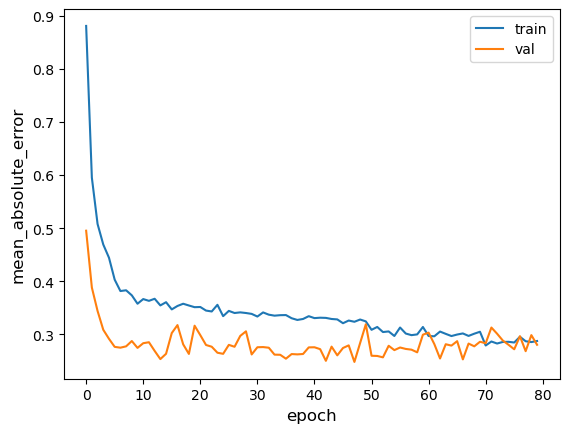

64/64 [==============================] - 0s 773us/step - loss: 0.2170 - mean_absolute_error: 0.2855
Test accuracy 0.28549841046333313
Test loss 0.2169717252254486


In [118]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [119]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [120]:
rmse(y_test.values, y_test_pred)

0.3154153810811703

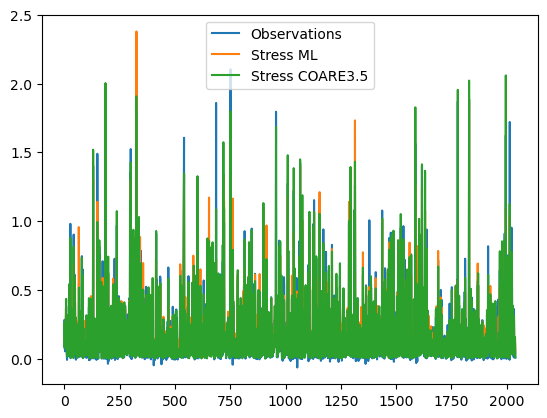

In [121]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

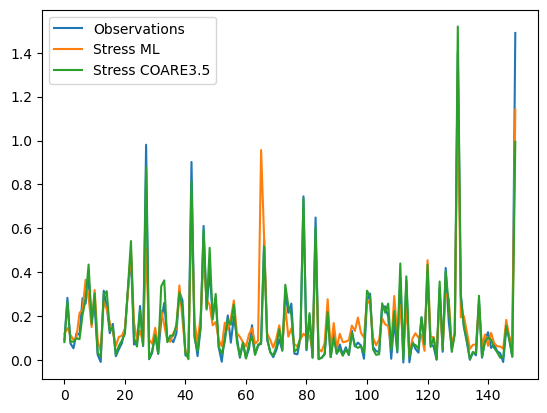

In [122]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [123]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.90174362],
       [0.90174362, 1.        ]])

In [124]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

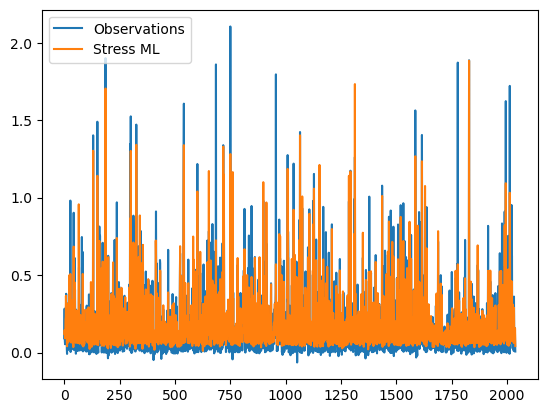

In [125]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [126]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97334573],
       [0.97334573, 1.        ]])

In [127]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.3098702523694205

Text(0, 0.5, 'Stress ML [N/m²]')

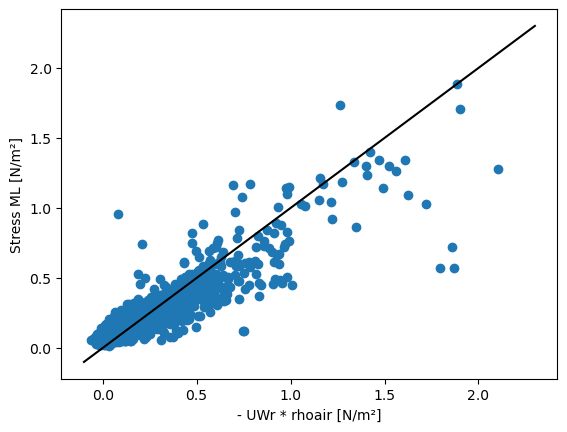

In [128]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [129]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [130]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [131]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 3s 12ms/step - loss: 2.7315 - mean_absolute_error: 1.1149 - val_loss: 1.1261 - val_mean_absolute_error: 0.6317
Epoch 2/500
179/179 [==============================] - 2s 11ms/step - loss: 0.8220 - mean_absolute_error: 0.6476 - val_loss: 0.7596 - val_mean_absolute_error: 0.4696
Epoch 3/500
179/179 [==============================] - 2s 11ms/step - loss: 0.6266 - mean_absolute_error: 0.5279 - val_loss: 0.4697 - val_mean_absolute_error: 0.3930
Epoch 4/500
179/179 [==============================] - 2s 11ms/step - loss: 0.4937 - mean_absolute_error: 0.4737 - val_loss: 0.2935 - val_mean_absolute_error: 0.3239
Epoch 5/500
179/179 [==============================] - 2s 11ms/step - loss: 0.4664 - mean_absolute_error: 0.4411 - val_loss: 0.2639 - val_mean_absolute_error: 0.2720
Epoch 6/500
179/179 [==============================] - 2s 11ms/step - loss: 0.4355 - mean_absolute_error: 0.4127 - val_loss: 0.2586 - val_mean_absolute_error: 0.2703
Epoc

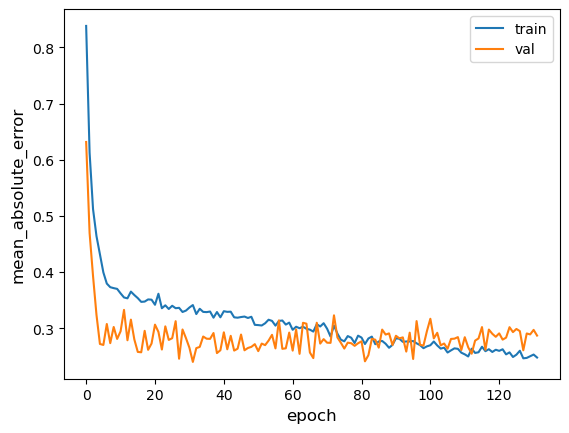

64/64 [==============================] - 0s 2ms/step - loss: 0.2065 - mean_absolute_error: 0.2985
Test accuracy 0.2985100746154785
Test loss 0.20653073489665985


In [133]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [137]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [138]:
rmse(y_test.values, y_test_pred)

0.324141622149822

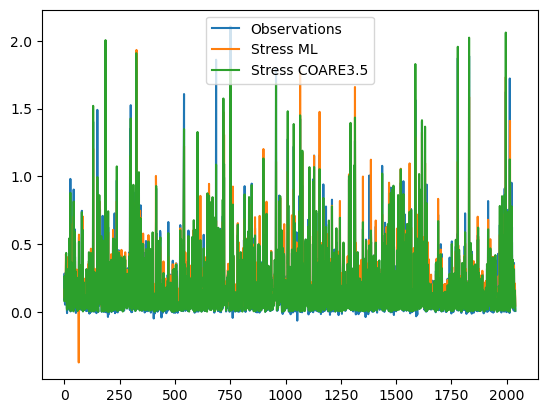

In [139]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

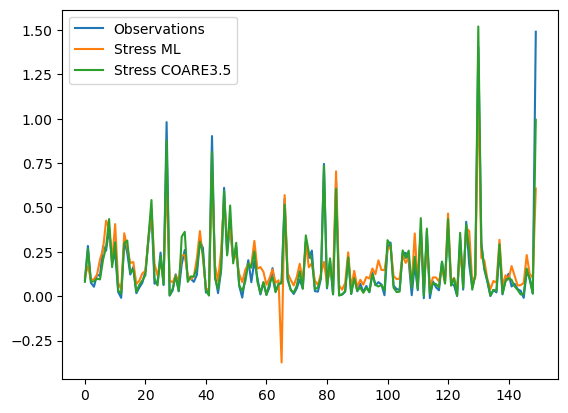

In [140]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [141]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.91131465],
       [0.91131465, 1.        ]])

In [142]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

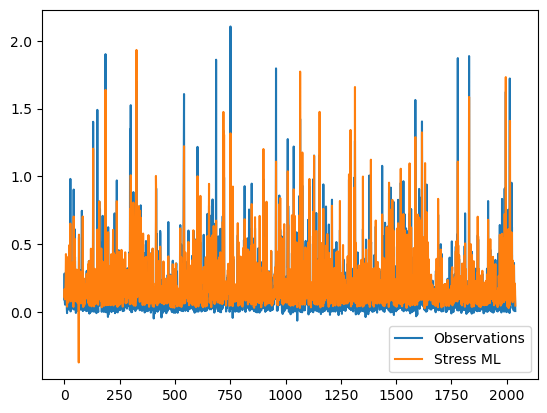

In [143]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [144]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [145]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.324141622149822

Text(0, 0.5, 'Stress ML [N/m²]')

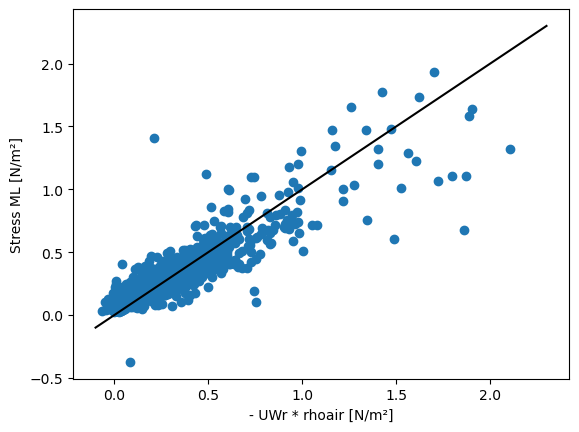

In [146]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

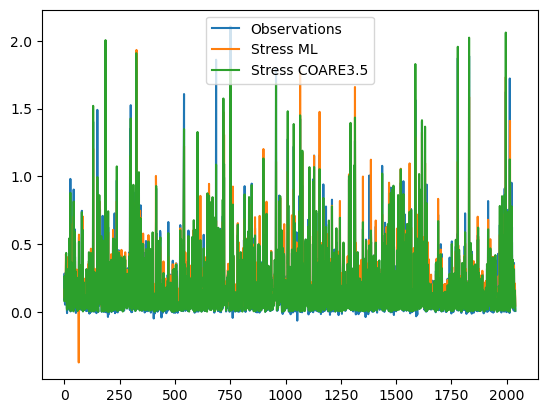

In [147]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -0.5], label='Stress COARE3.5')
plt.legend()

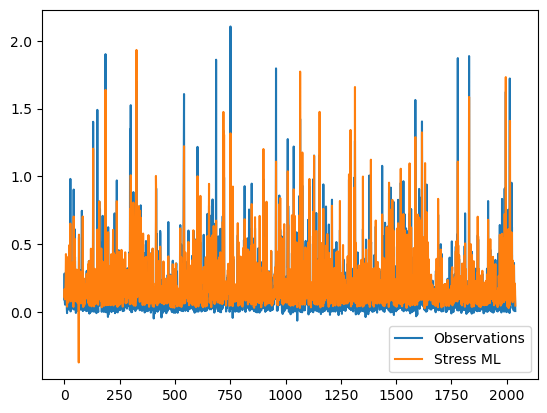

In [148]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.legend()

In [149]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5, 0])

array([[1.        , 0.91131465],
       [0.91131465, 1.        ]])

In [150]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [151]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

0.324141622149822

Text(0, 0.5, 'Stress ML [N/m²]')

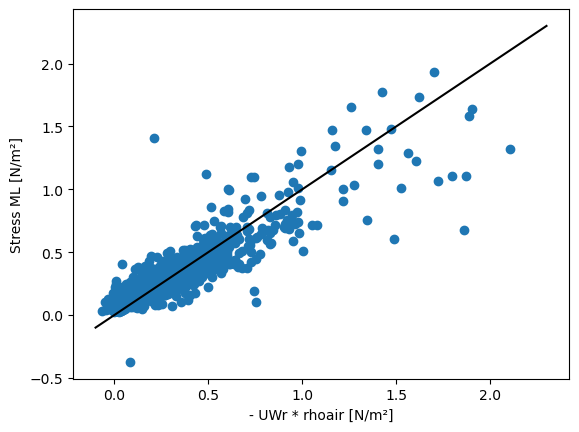

In [152]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [28]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [29]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [30]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 41ms/step - loss: 12.2220 - mean_absolute_error: 2.2310 - val_loss: 0.8595 - val_mean_absolute_error: 0.6407
Epoch 2/500
12/12 [==============================] - 0s 32ms/step - loss: 1.7593 - mean_absolute_error: 0.9843 - val_loss: 0.7666 - val_mean_absolute_error: 0.5601
Epoch 3/500
12/12 [==============================] - 0s 30ms/step - loss: 1.1211 - mean_absolute_error: 0.7719 - val_loss: 0.7771 - val_mean_absolute_error: 0.5233
Epoch 4/500
12/12 [==============================] - 0s 32ms/step - loss: 0.9583 - mean_absolute_error: 0.7014 - val_loss: 0.8587 - val_mean_absolute_error: 0.5524
Epoch 5/500
12/12 [==============================] - 0s 31ms/step - loss: 0.7631 - mean_absolute_error: 0.6329 - val_loss: 0.8867 - val_mean_absolute_error: 0.5449
Epoch 6/500
12/12 [==============================] - 0s 31ms/step - loss: 0.7775 - mean_absolute_error: 0.6371 - val_loss: 0.8434 - val_mean_absolute_error: 0.5436
Epoch 7/500
12/

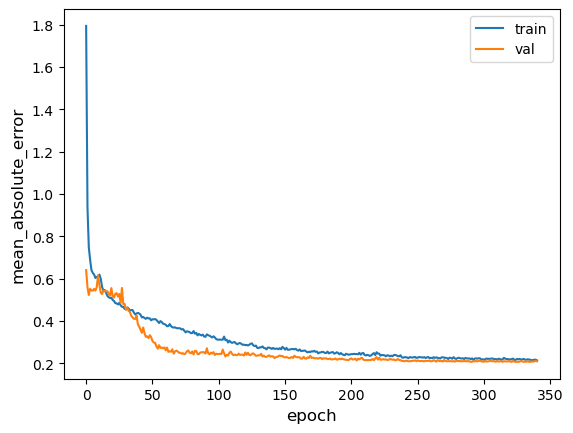

64/64 [==============================] - 0s 2ms/step - loss: 0.1853 - mean_absolute_error: 0.2266
Test accuracy 0.22657062113285065
Test loss 0.1852853000164032


In [31]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [32]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [33]:
rmse(y_test.values, y_test_pred)

0.3206326517252082

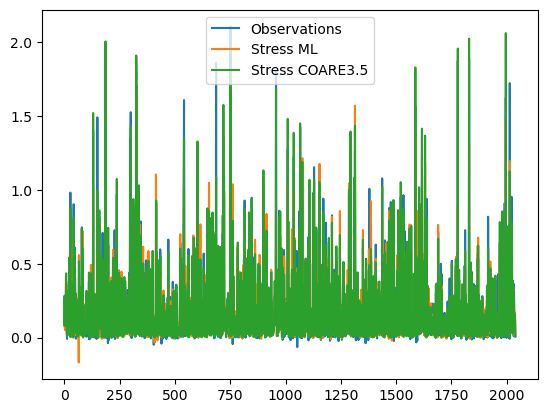

In [34]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

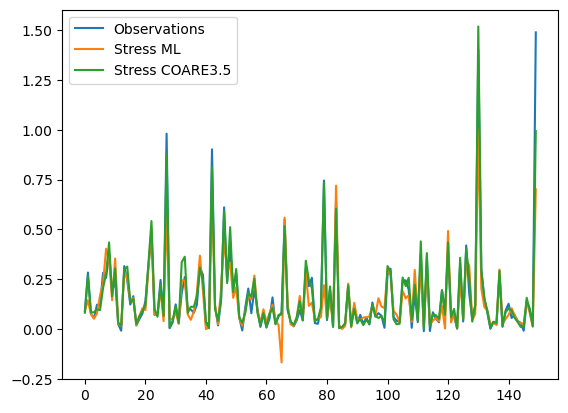

In [35]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [36]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.91701259],
       [0.91701259, 1.        ]])

In [37]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

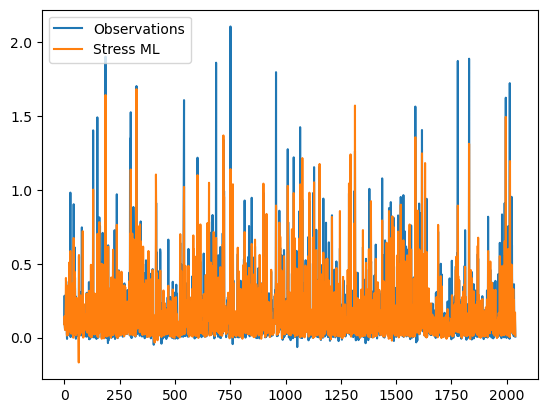

In [38]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [39]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [40]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3206326517252082

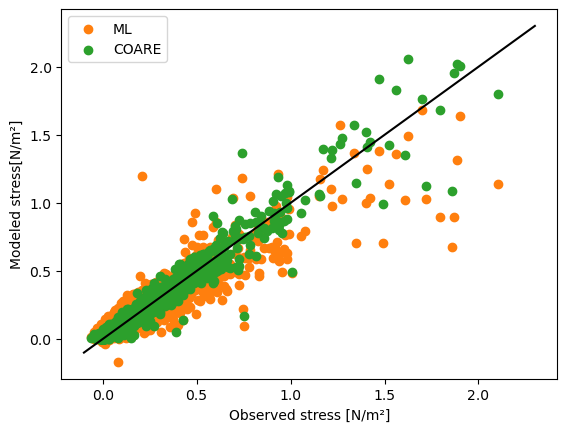

In [42]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

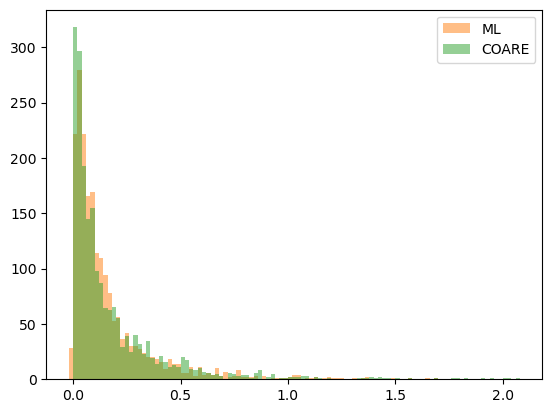

In [55]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

# Best model

In [228]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [229]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [230]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 38ms/step - loss: 10.7869 - mean_absolute_error: 2.2084 - val_loss: 0.8002 - val_mean_absolute_error: 0.5961
Epoch 2/500
12/12 [==============================] - 0s 28ms/step - loss: 1.3741 - mean_absolute_error: 0.8819 - val_loss: 0.7753 - val_mean_absolute_error: 0.5531
Epoch 3/500
12/12 [==============================] - 0s 28ms/step - loss: 1.0086 - mean_absolute_error: 0.7366 - val_loss: 0.7894 - val_mean_absolute_error: 0.5325
Epoch 4/500
12/12 [==============================] - 0s 28ms/step - loss: 0.9213 - mean_absolute_error: 0.6638 - val_loss: 0.7922 - val_mean_absolute_error: 0.5481
Epoch 5/500
12/12 [==============================] - 0s 29ms/step - loss: 0.7856 - mean_absolute_error: 0.6232 - val_loss: 0.8630 - val_mean_absolute_error: 0.5312
Epoch 6/500
12/12 [==============================] - 0s 28ms/step - loss: 0.7639 - mean_absolute_error: 0.6295 - val_loss: 0.8696 - val_mean_absolute_error: 0.5363
Epoch 7/500
12/

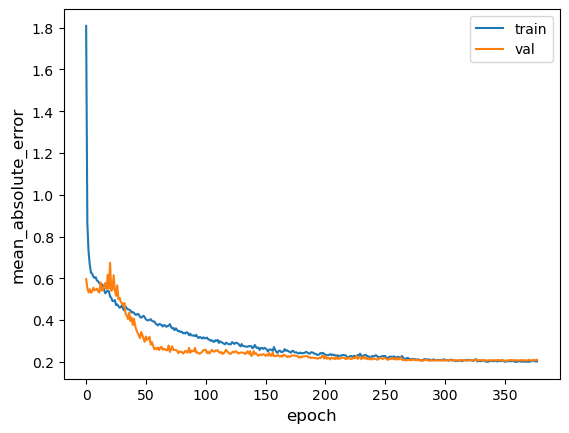

64/64 [==============================] - 0s 2ms/step - loss: 0.1752 - mean_absolute_error: 0.2234
Test accuracy 0.22335410118103027
Test loss 0.1751844882965088


In [231]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [232]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [233]:
rmse(y_test.values, y_test_pred)

0.32804331095052003

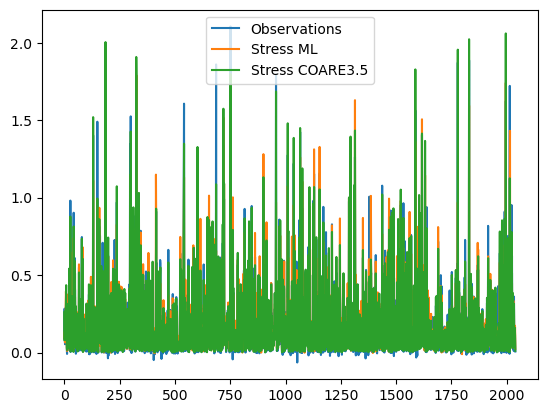

In [234]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

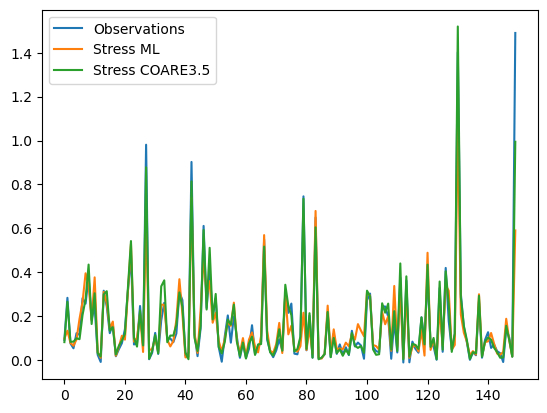

In [235]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [236]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.91763419],
       [0.91763419, 1.        ]])

In [237]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

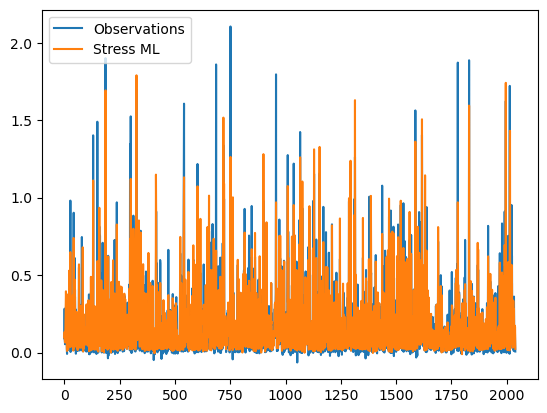

In [238]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [239]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [240]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.32804331095052003

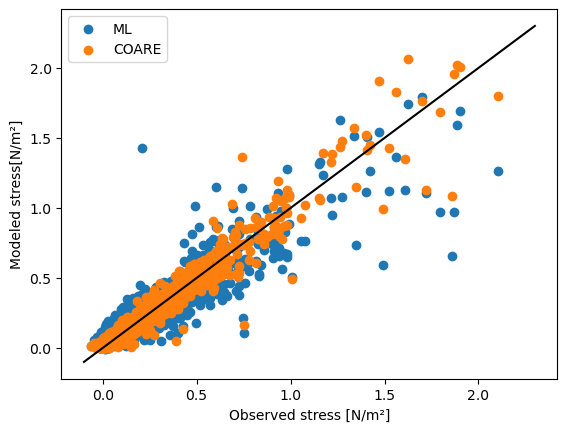

In [241]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

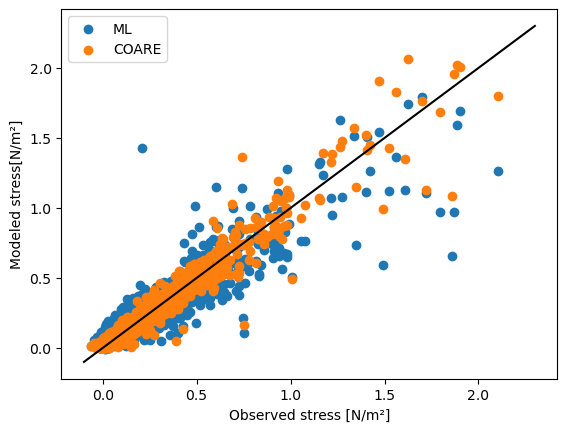

In [242]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [174]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [175]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [176]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 129ms/step - loss: 16.3227 - mean_absolute_error: 2.6953 - val_loss: 0.7677 - val_mean_absolute_error: 0.5451
Epoch 2/500
6/6 [==============================] - 1s 103ms/step - loss: 2.2293 - mean_absolute_error: 1.1094 - val_loss: 0.7479 - val_mean_absolute_error: 0.5540
Epoch 3/500
6/6 [==============================] - 1s 101ms/step - loss: 1.8442 - mean_absolute_error: 0.9997 - val_loss: 0.8437 - val_mean_absolute_error: 0.5635
Epoch 4/500
6/6 [==============================] - 1s 101ms/step - loss: 1.5664 - mean_absolute_error: 0.9153 - val_loss: 0.7750 - val_mean_absolute_error: 0.5184
Epoch 5/500
6/6 [==============================] - 1s 101ms/step - loss: 1.1774 - mean_absolute_error: 0.7997 - val_loss: 0.8548 - val_mean_absolute_error: 0.6028
Epoch 6/500
6/6 [==============================] - 1s 101ms/step - loss: 1.0094 - mean_absolute_error: 0.7114 - val_loss: 1.1603 - val_mean_absolute_error: 0.6763
Epoch 7/500
6/6 [====

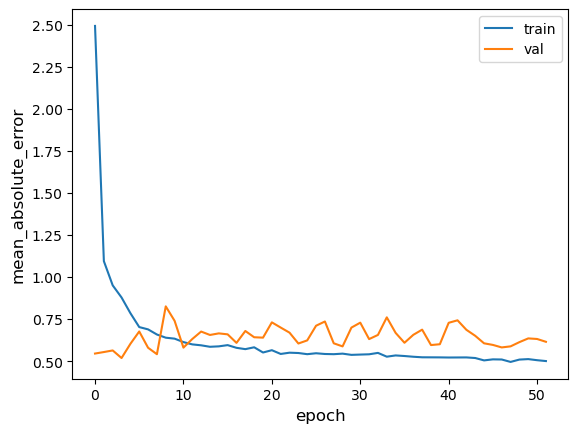

64/64 [==============================] - 0s 7ms/step - loss: 1.3324 - mean_absolute_error: 0.6682
Test accuracy 0.6681581139564514
Test loss 1.3323904275894165


In [177]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [178]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [179]:
rmse(y_test.values, y_test_pred)

0.29073827943792596

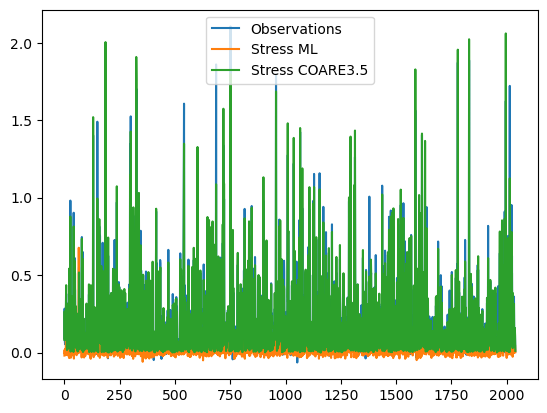

In [180]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

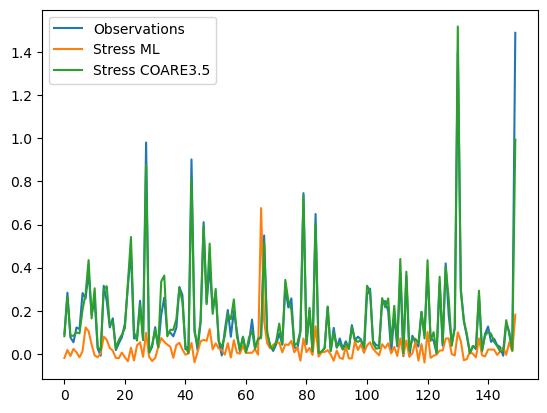

In [181]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [182]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.58634051],
       [0.58634051, 1.        ]])

In [183]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

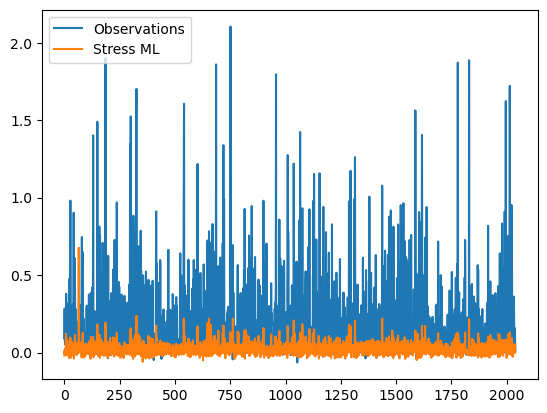

In [184]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [185]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [186]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.29073827943792596

Text(0, 0.5, 'Stress ML [N/m²]')

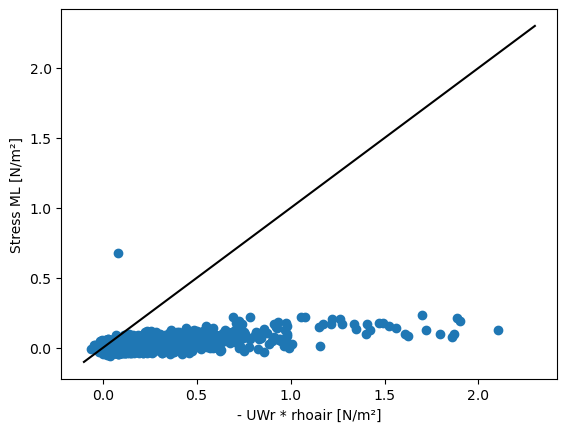

In [187]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [189]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [190]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [191]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 638ms/step - loss: 16.1541 - mean_absolute_error: 2.7406 - val_loss: 0.8035 - val_mean_absolute_error: 0.5691
Epoch 2/1000
3/3 [==============================] - 2s 546ms/step - loss: 2.9329 - mean_absolute_error: 1.2941 - val_loss: 0.5879 - val_mean_absolute_error: 0.5175
Epoch 3/1000
3/3 [==============================] - 2s 549ms/step - loss: 2.2330 - mean_absolute_error: 1.0250 - val_loss: 0.8472 - val_mean_absolute_error: 0.6093
Epoch 4/1000
3/3 [==============================] - 2s 550ms/step - loss: 1.4599 - mean_absolute_error: 0.8418 - val_loss: 0.6309 - val_mean_absolute_error: 0.4651
Epoch 5/1000
3/3 [==============================] - 2s 542ms/step - loss: 1.1958 - mean_absolute_error: 0.7781 - val_loss: 0.8244 - val_mean_absolute_error: 0.5103
Epoch 6/1000
3/3 [==============================] - 2s 547ms/step - loss: 1.3782 - mean_absolute_error: 0.7815 - val_loss: 0.8572 - val_mean_absolute_error: 0.5935
Epoch 7/1000
3/

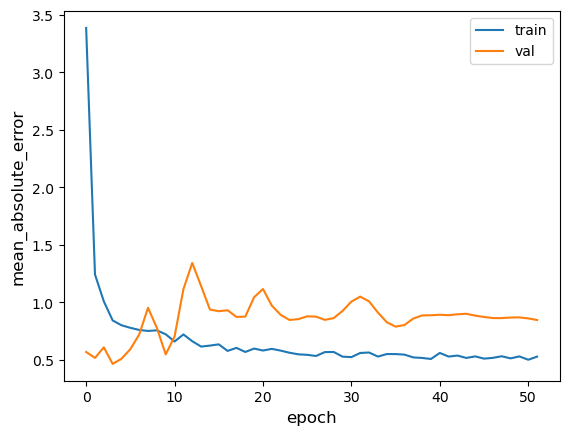

64/64 [==============================] - 2s 25ms/step - loss: 1.8286 - mean_absolute_error: 0.9031
Test accuracy 0.903120219707489
Test loss 1.8286179304122925


In [192]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [193]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [194]:
rmse(y_test.values, y_test_pred)

0.3248165813231707

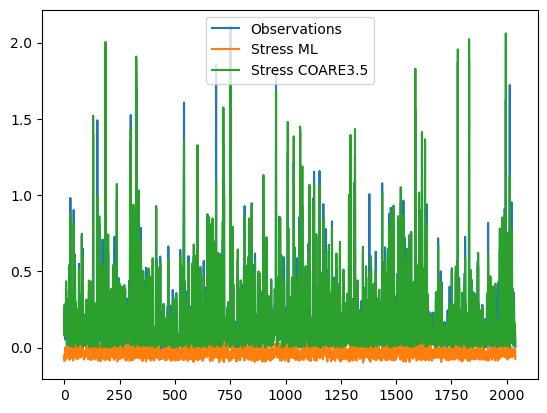

In [196]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

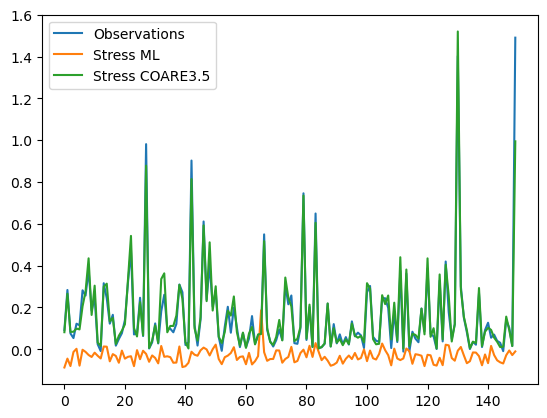

In [197]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [199]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.38140919],
       [0.38140919, 1.        ]])

In [200]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

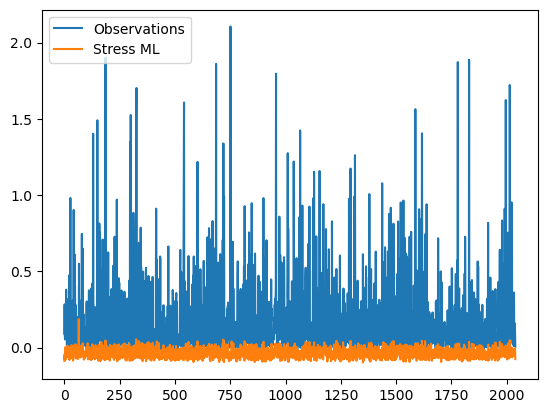

In [201]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [203]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [204]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3248165813231707

Text(0, 0.5, 'Stress ML [N/m²]')

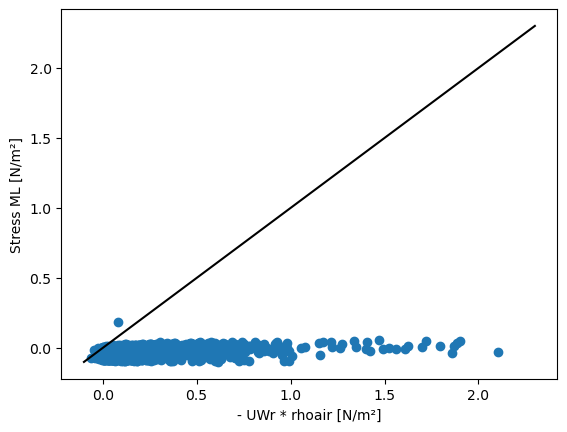

In [206]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [207]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [208]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


In [209]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 587ms/step - loss: 25.4100 - mean_absolute_error: 3.3778 - val_loss: 1.2084 - val_mean_absolute_error: 0.7793
Epoch 2/1000
3/3 [==============================] - 2s 508ms/step - loss: 3.0367 - mean_absolute_error: 1.3004 - val_loss: 0.7781 - val_mean_absolute_error: 0.5111
Epoch 3/1000
3/3 [==============================] - 1s 498ms/step - loss: 2.1559 - mean_absolute_error: 1.1101 - val_loss: 0.6316 - val_mean_absolute_error: 0.5705
Epoch 4/1000
3/3 [==============================] - 1s 506ms/step - loss: 1.6832 - mean_absolute_error: 0.9462 - val_loss: 0.4752 - val_mean_absolute_error: 0.4741
Epoch 5/1000
3/3 [==============================] - 1s 501ms/step - loss: 1.4862 - mean_absolute_error: 0.8997 - val_loss: 0.9580 - val_mean_absolute_error: 0.7460
Epoch 6/1000
3/3 [==============================] - 1s 503ms/step - loss: 1.2955 - mean_absolute_error: 0.8380 - val_loss: 1.0899 - val_mean_absolute_error: 0.8503
Epoch 7/1000
3/

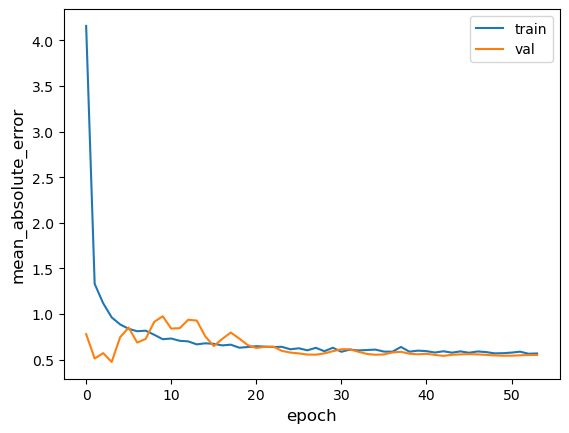

64/64 [==============================] - 2s 24ms/step - loss: 1.1499 - mean_absolute_error: 0.6019
Test accuracy 0.6018977165222168
Test loss 1.1499390602111816


In [210]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [211]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [212]:
rmse(y_test.values, y_test_pred)

0.25518038016896494

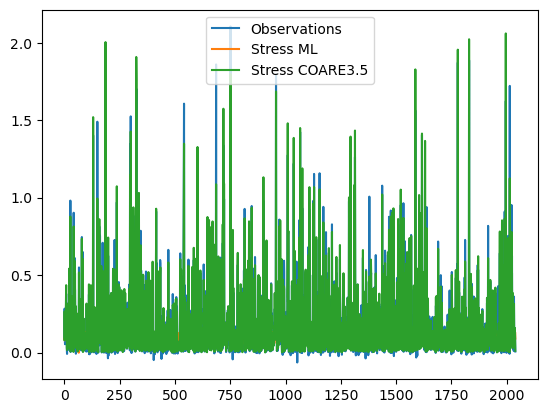

In [213]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

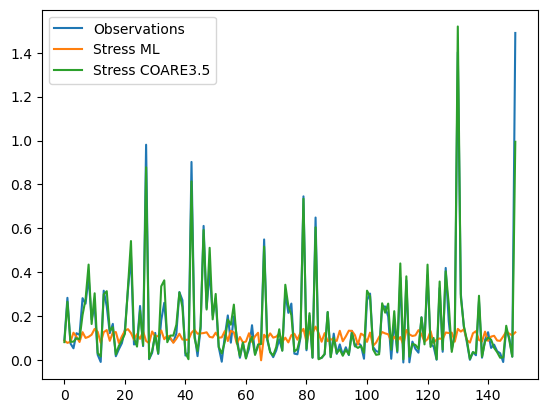

In [215]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [217]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.25902737],
       [0.25902737, 1.        ]])

In [219]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

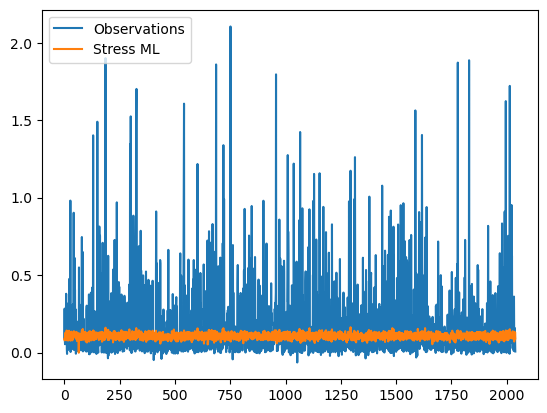

In [220]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [221]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [222]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.25518038016896494

Text(0, 0.5, 'Stress ML [N/m²]')

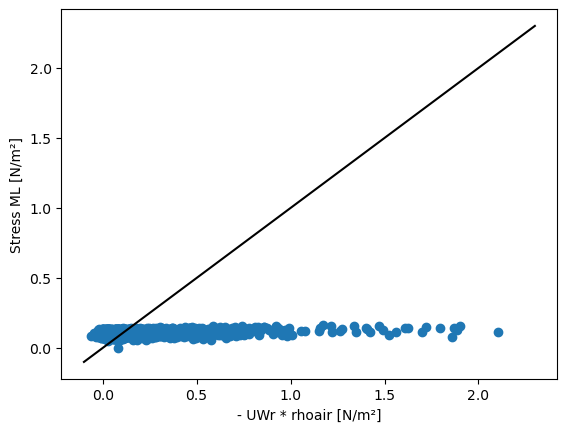

In [224]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [225]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_squared_error'

In [226]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


In [227]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 626ms/step - loss: 21.5084 - mean_absolute_error: 3.1778 - val_loss: 0.9856 - val_mean_absolute_error: 0.7079
Epoch 2/1000
3/3 [==============================] - 2s 553ms/step - loss: 2.7163 - mean_absolute_error: 1.2586 - val_loss: 0.6751 - val_mean_absolute_error: 0.5332
Epoch 3/1000
3/3 [==============================] - 2s 551ms/step - loss: 2.1454 - mean_absolute_error: 1.0779 - val_loss: 0.7089 - val_mean_absolute_error: 0.5499
Epoch 4/1000
3/3 [==============================] - 2s 537ms/step - loss: 1.9805 - mean_absolute_error: 0.9495 - val_loss: 0.7483 - val_mean_absolute_error: 0.5651
Epoch 5/1000
3/3 [==============================] - 2s 536ms/step - loss: 1.5484 - mean_absolute_error: 0.8959 - val_loss: 1.6586 - val_mean_absolute_error: 0.9758
Epoch 6/1000
3/3 [==============================] - 2s 542ms/step - loss: 1.4392 - mean_absolute_error: 0.8160 - val_loss: 1.9997 - val_mean_absolute_error: 1.1889
Epoch 7/1000
3/

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [ ]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [ ]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

In [ ]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

In [ ]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 